In [1]:
import os
import shutil
import tensorflow as tf
import PIL.Image
import matplotlib.pyplot as plt

# www.kaggle.com/c/dogs-vs-cats/data
Download dataset from link above

In [2]:



original_dataset_dir = '/Users/usama bantwa/Desktop/cats-vs-dogs/train'      # jis folders mai sare pics hai name ke sath

In [3]:
base_dir = '/Users/usama bantwa/Desktop/cats_and_dogs_small' 
os.mkdir(base_dir)                          # created new empty folder in current directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)                         # us folder ke ander train ka folder banaya
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)                    # and so on
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: '/Users/usama bantwa/Desktop/cats_and_dogs_small'

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)                   # cat ka folder banaya train ke ander
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)                   # dog ka folder banaya train ke ander

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)                    # cat ka folder banaya test ke ander
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)                    # dog ka folder banaya test ke ander

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)               # cat ka folder banaya validation ke ander
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)               # dog ka folder banaya validation ke ander

In [ ]:
# we only created empty folders in above coding
# os.mkdir se new folder bante hai bake folder names ya path hai
# Now we are going to copy files in those folders

In [ ]:
fnames = []
for i in range(1000):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                   # copying cats pics in empty train folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(train_cats_dir, x)
    shutil.copyfile(src, dst)

In [ ]:
fnames = []
for i in range(1000, 1500):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                        # copying cats pics in empty validation folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(validation_cats_dir, x)
    shutil.copyfile(src, dst)

In [ ]:
fnames = []
for i in range(1500, 2000):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                         # copying cats pics in empty test folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(test_cats_dir, x)
    shutil.copyfile(src, dst)

In [ ]:
# above copied 1000 train, 500 test $ 500 validation cats pictures
# now doing same for dogs

In [ ]:
fnames = []
for i in range(1000):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                   # copying dogs pics in empty train folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(train_dogs_dir, x)
    shutil.copyfile(src, dst)

In [ ]:
fnames = []
for i in range(1000, 1500):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                        # copying dogs pics in empty validation folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(validation_dogs_dir, x)
    shutil.copyfile(src, dst)

In [ ]:
fnames = []
for i in range(1500, 2000):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                         # copying dogs pics in empty test folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(test_dogs_dir, x)
    shutil.copyfile(src, dst)

# First model

In [ ]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')])

model.summary()

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Normalizing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# reshaping training images
train_generator = train_datagen.flow_from_directory(
                  train_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary') # binary create labels

In [ ]:
# reshaping validation images
validation_generator = test_datagen.flow_from_directory(
                       validation_dir,target_size=(150, 150),
                       batch_size=20,class_mode='binary')

In [ ]:
# reshaping training images
test_generator =  train_datagen.flow_from_directory(
                  test_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary')

In [ ]:
epochs = 20 # in book example we did 100 epochs
history = model.fit_generator(
          train_generator,steps_per_epoch=10,
          epochs=epochs,validation_data=validation_generator,
          validation_steps=50)

In [ ]:
#evaluation = model.evaluate_generator(test_generator,steps=None,callbacks=None,max_queue_size=10,
#                                      workers=1,use_multiprocessing=False,verbose=0,)
#print("Loss: ",evaluation[0]*100,"%")
#print("Accuracy: ",evaluation[1]*100,"%")

In [ ]:
history.history.keys()

# Plotting training and validation loss

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
# saving the model
model.save('cats_and_dogs_small_1.h5')

In [25]:
# Using data augmentation to create new pictures
# because we use very little data

In [26]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,shear_range=0.2,
                             zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [27]:
# Displaying some randomly augmented training images

In [28]:
from tensorflow.keras.preprocessing import image
fnames = []
for i in os.listdir(train_cats_dir):
    a = os.path.join(train_cats_dir, i)
    fnames.append(a)
#fnames have the pictures names with location
print(fnames[3])

cats_and_dogs_small\train\cats\cat.100.jpg


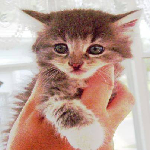

In [29]:
# lets show 1 image
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
img

In [30]:
# converted above picture in ndarray for data augmentaion
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[222., 223., 218.],
         [223., 224., 219.],
         [223., 224., 219.],
         ...,
         [240., 241., 246.],
         [234., 235., 240.],
         [247., 244., 251.]],

        [[219., 220., 215.],
         [222., 223., 218.],
         [224., 225., 220.],
         ...,
         [243., 244., 249.],
         [234., 235., 240.],
         [239., 242., 247.]],

        [[226., 227., 222.],
         [224., 225., 220.],
         [223., 224., 219.],
         ...,
         [242., 243., 248.],
         [241., 242., 247.],
         [232., 240., 243.]],

        ...,

        [[207., 210., 215.],
         [207., 213., 213.],
         [206., 212., 208.],
         ...,
         [215., 212., 207.],
         [215., 212., 207.],
         [217., 212., 209.]],

        [[219., 212., 220.],
         [211., 209., 212.],
         [206., 206., 204.],
         ...,
         [215., 212., 207.],
         [215., 212., 207.],
         [217., 212., 209.]],

        [[213., 217., 226.],
       

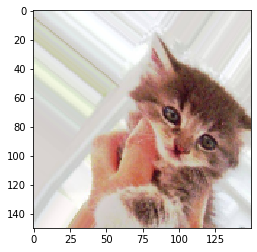

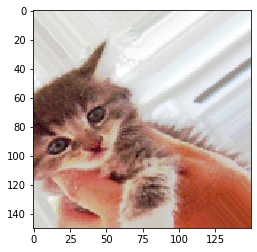

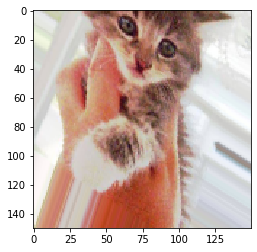

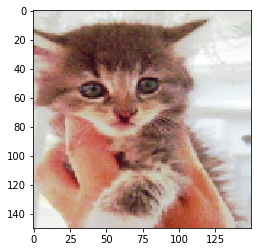

In [31]:
# making 4 pictures from 1 picture
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Defining a new convnet that includes dropout

In [32]:
models = tf.keras.Sequential
layers = tf.keras.layers

model1 = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [33]:
from tensorflow.keras import optimizers

model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the convnet using data-augmentation generators

In [34]:
# genrating new pictures and rescaling it

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                width_shift_range=0.2,height_shift_range=0.2,
                shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

In [35]:
# only rescaling

test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
# Note that the validation data shouldnâ€™t be augmented!

In [37]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [38]:
validation_generator = test_datagen.flow_from_directory(
                       validation_dir,target_size=(150, 150),
                       batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [39]:
epochs = 40 # in book example we did 100 epochs
history1 = model1.fit_generator(
          train_generator,steps_per_epoch=10,
          epochs=epochs,validation_data=validation_generator,
          validation_steps=50)

Epoch 1/40
10/10 [==============================] - 22s 2s/step - loss: 0.7003 - accuracy: 0.5200 - val_loss: 0.6944 - val_accuracy: 0.4700
Epoch 2/40
10/10 [==============================] - 22s 2s/step - loss: 0.6976 - accuracy: 0.4850 - val_loss: 0.6941 - val_accuracy: 0.4820
Epoch 3/40
10/10 [==============================] - 22s 2s/step - loss: 0.6922 - accuracy: 0.4850 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/40
10/10 [==============================] - 22s 2s/step - loss: 0.7001 - accuracy: 0.4250 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/40
10/10 [==============================] - 22s 2s/step - loss: 0.6976 - accuracy: 0.4550 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 6/40
10/10 [==============================] - 22s 2s/step - loss: 0.6919 - accuracy: 0.5450 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 7/40
10/10 [==============================] - 22s 2s/step - loss: 0.6963 - accuracy: 0.5200 - val_loss: 0.6914 - val_accuracy: 0.5360
Epoch 8/40
10/10 [==

In [40]:
#evaluation1 = model1.evaluate_generator(test_generator,steps=None,callbacks=None,max_queue_size=10,
#                                      workers=1,use_multiprocessing=False,verbose=0,)
#print("Loss: ",evaluation1[0]*100,"%")
#print("Accuracy: ",evaluation1[1]*100,"%")

In [41]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting training and validation loss

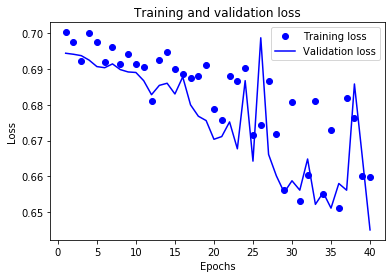

In [42]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation Accuracy

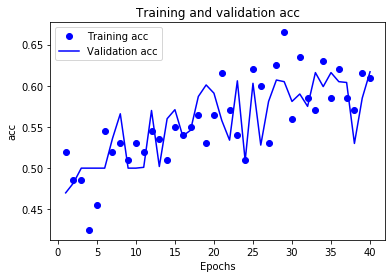

In [43]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [44]:
# saving model
model1.save('cats_and_dogs_small_2.h5')

# Feature extraction

In [45]:
# This file is still work in progress